# Data Analytics

## Importing libraries

The neccessary libraries for this notebook are imported along with the project library <br>
Libraries used:
- Pandas & Numpy : Data Handling
- Seaborn & Matplotlib : Data Visualisation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

project_token = 'p-3f704f3cdf69a8a61cd7aa18710a153652a855a1'

from project_lib import Project
project = Project( project_access_token=project_token)
pc = project.project_context

The code below does some styling chanages to have better looking graphs from _seaborn_

In [2]:
sns.set_style('darkgrid')
sns.set_context('notebook')
sns.set_palette('rainbow')

## Importing Data

Since the data is stored in theproject itself, it can be imported using prebuit _IBM waston studio_ commands.

In [3]:
# The code was removed by Watson Studio for sharing.

The imported data is stored in a dataframe called _Data_

In [4]:
data  = pd.read_csv(body)

Viewing the top 5 rows tio ensure proper import using the ```.head()``` function from _pandas_

In [5]:
data.head()

,selling_price (in lakhs),age,seller_type,km_driven (in thousands),owner_type,fuel_type,transmission_type,mileage,engine_size (in cc),max_power (in bhp),seats,maker,model,variant
0,1.20,9.0,Individual,120.0,First Owner,Petrol,Manual,19.70,796,46.30,5,MARUTI,ALTO,STD
1,5.50,5.0,Individual,20.0,First Owner,Petrol,Manual,18.90,1197,82.00,5,HYUNDAI,GRAND,I10 ASTA
2,2.15,11.0,Individual,60.0,First Owner,Petrol,Manual,17.00,1197,80.00,5,HYUNDAI,I20,ASTA
3,2.26,9.0,Individual,37.0,First Owner,Petrol,Manual,20.92,998,67.10,5,MARUTI,ALTO,K10 2010-2014 VXI
4,5.70,6.0,Dealer,30.0,First Owner,Diesel,Manual,22.77,1498,98.59,5,FORD,ECOSPORT,2015-2021 1.5 TDCI TITANIUM BSIV


## Exploratory Data Analysis

Creating a class _Outlier_params_ to calculate the IQR, upper bound and lower bound thata can be used for easy detection of outliers

In [111]:
class Outlier_params:
    def __init__(self, dataframe, column):
        self.dataframe = dataframe
        self.column = column
        self.descriptors = dataframe[column].describe()
        self.IQR = self.descriptors['75%'] - self.descriptors['25%']
        self.lower = self.descriptors['25%'] - (1.5*self.IQR)
        self.upper = self.descriptors['75%'] + (1.5*self.IQR)
        
    def descriptors(self):
        return(self.descriptors)
        
    def IQR(self):        
        return(self.IQR)
    
    def lower_Bound(self):
        return(self.lower)
    
    def upper_Bound(self):
        return(self.upper)
    
    def outliers(self):
        #outlier_data = self.dataframe[self.dataframe[self.column]>self.upper]
        outlier_data = pd.concat([self.dataframe[self.dataframe[self.column]>self.upper],
                                 self.dataframe[self.dataframe[self.column]<self.lower]],axis=0)
        return(outlier_data)

### Distriburion of Selling Price

A histogram will be used to see the disstribution of the resale vehicles of cars

<AxesSubplot:xlabel='selling_price (in lakhs)', ylabel='Count'>

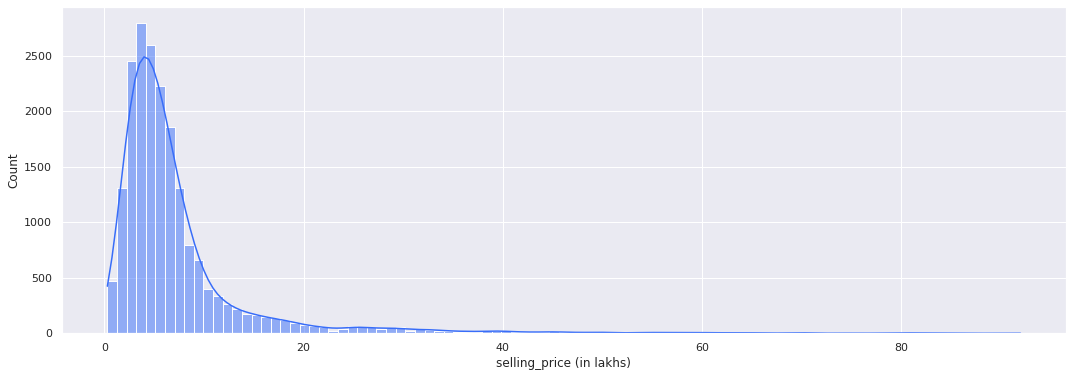

In [14]:
plt.figure(figsize=(18,6))
sns.histplot(data=data['selling_price (in lakhs)'],bins=95,kde=True)

From the histogram, it is clear that:<br>
- Most of the cars sold are below Rs.10 Lakh
- There are negligible cars with a resale above Rs.40 Lakh

In [116]:
sp_outliers = Outlier_params(data,'selling_price (in lakhs)')
print('Key Descriptors','\n',sp_outliers.descriptors)
print('\n')
print('Number of outliers',sp_outliers.outliers().shape[0])

Key Descriptors 
 count    19629.000000
mean         7.358217
std          8.050190
min          0.300000
25%          3.450000
50%          5.250000
75%          7.900000
max         92.000000
Name: selling_price (in lakhs), dtype: float64


Number of outliers 1779


### Distribution of Age

<AxesSubplot:xlabel='age', ylabel='Count'>

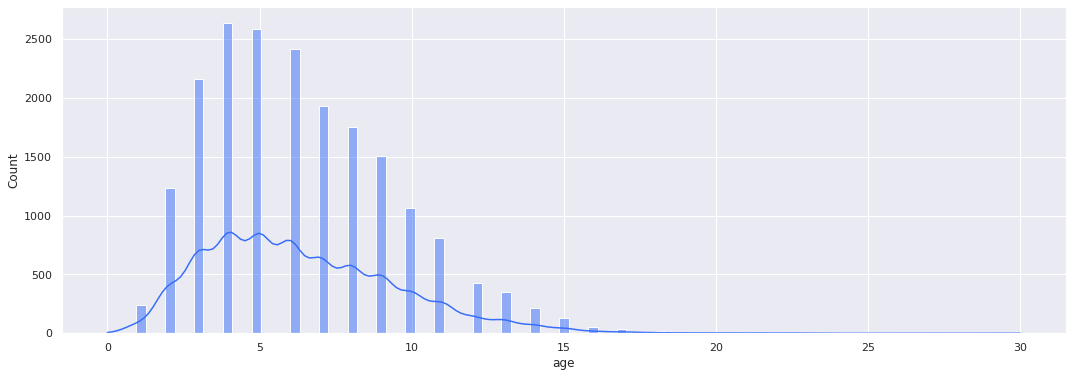

In [30]:
plt.figure(figsize=(18,6))
sns.histplot(data=data['age'],bins=95,kde=True)

In [119]:
age_outliers = Outlier_params(data,'age')
print('Key Descriptors','\n',age_outliers.descriptors)
print('\n')
print('Number of outliers',age_outliers.outliers().shape[0])

Key Descriptors 
 count    19629.000000
mean         6.387997
std          3.163107
min          0.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         30.000000
Name: age, dtype: float64


Number of outliers 287


### Distribution of Kilometers Driven

In [24]:
data = data[data['km_driven (in thousands)']<1000]

<AxesSubplot:xlabel='km_driven (in thousands)', ylabel='Count'>

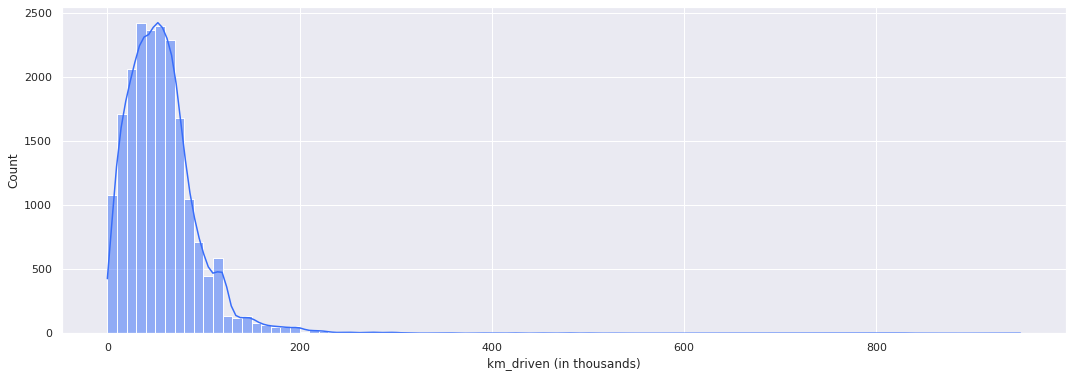

In [31]:
plt.figure(figsize=(18,6))
sns.histplot(data=data['km_driven (in thousands)'],bins=95,kde=True)

In [122]:
km_outliers = Outlier_params(data,'km_driven (in thousands)')
print('Key Descriptors','\n',km_outliers.descriptors)
print('\n')
print('Number of outliers',km_outliers.outliers().shape[0])

Key Descriptors 
 count    19629.000000
mean        57.617136
std         41.909322
min          0.100000
25%         31.000000
50%         51.452000
75%         73.001000
max        950.000000
Name: km_driven (in thousands), dtype: float64


Number of outliers 636


### Correlation between Features

<AxesSubplot:>

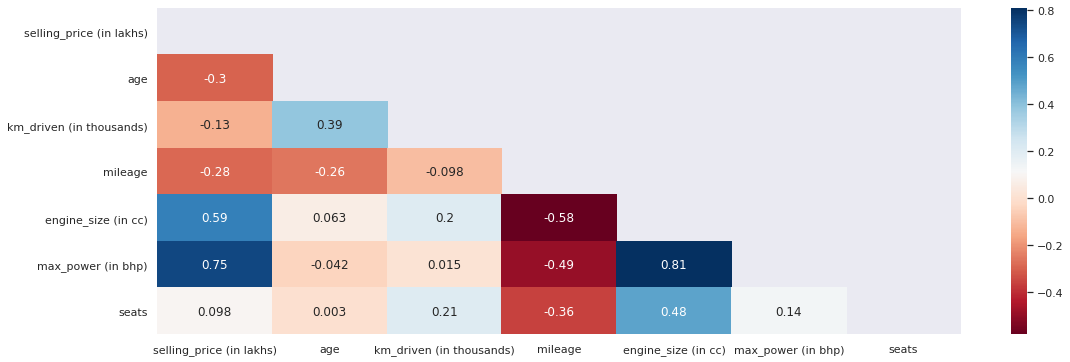

In [143]:
temp 

mask = np.triu(np.ones_like(data.corr()))
plt.figure(figsize=(18,6))
sns.heatmap(data.corr(),annot=True,cmap='RdBu', mask = mask)

## Notes

### Author 
Created by **Bhavesh Jain** <br>
Github link - https://github.com/bhaveshjain1612 <br>
Linkedin Link - https://www.linkedin.com/in/bhaveshjain1612/ <br>
Kaggle link - https://www.kaggle.com/bhaveshjain1612 <br>

### Changelog


| Date      | Name | Change     |
| :---        |    :----:   |          ---: |
| 27/09/2021      | Bhavesh Jain       | Created Notebook  |
| 28/09/2021   | Bhavesh Jain        | Added Import and EDA section      |